In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, select

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
# engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()
session.query(Measurement.date).order_by(Measurement.date.asc()).first()
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
    # result: ('2017-08-23',)

('2017-08-23',)

2016-08-23


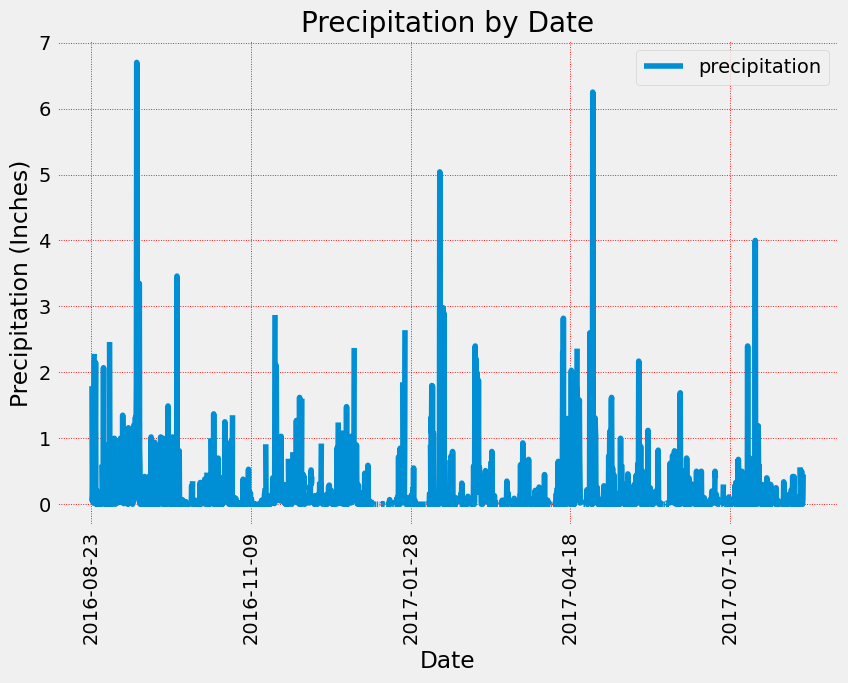

In [10]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
most_recent_date = dt.date(2017,8,23)

# Calculate the date one year from the last date in data set.
one_year_past = most_recent_date - dt.timedelta(days=365)
print(one_year_past)

# Perform a query to retrieve the date and precipitation scores
info_all = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_past).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_date_df = pd.DataFrame(info_all, columns=['date', 'precipitation'])
better_index = precip_date_df.set_index("date")

# Sort the dataframe by date
best_index = better_index.sort_values(by="date", ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
best_index.plot.line(figsize = (9,6), rot=90)

# Label some things
plt.grid(color = 'red', linestyle = ':', linewidth = .66)
plt.title("Precipitation by Date")
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_date_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
station_numbers = session.query(Station.station).count()
print(station_numbers)

9


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_count_df = pd.DataFrame(active_station, columns=['station', 'count'])
station_count_df
# Most active: USC00519281 (Waihee) has the greatest number of observations at 2772 entries

,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
function_list = [Measurement.station,
       func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
waihee_data = session.query(*function_list).filter(Measurement.station == "USC00519281").all()
waihee_df = pd.DataFrame(waihee_data, columns=['station', 'min', 'max', 'avg'])
waihee_df


,station,min,max,avg
0,USC00519281,54.0,85.0,71.663781


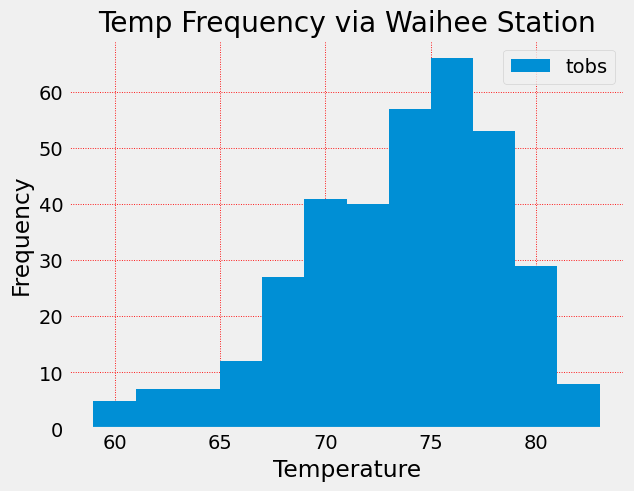

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
waihee_alpha = session.query(Measurement.tobs).filter(Measurement.date >= one_year_past, Measurement.station == "USC00519281").all()
waihee_omega = pd.DataFrame(waihee_alpha)
waihee_omega.plot.hist(bins=12)
# Label some things
plt.grid(color = 'red', linestyle = ':', linewidth = .66)
plt.title("Temp Frequency via Waihee Station")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close session

In [16]:
# Close Session
session.close()